## TTC Delays
## Predictive and Prescriptive Analytics for Delay Reduction
## Business Problem: The Toronto Transit Commission (TTC) subway system faces an operational issue with average delays of 3 minutes, leading to commuter dissatisfaction and a decline in ridership. The objective is to reduce these delays by 10%, improving both the rider experience and operational efficiency.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [33]:
delay_df = pd.read_csv(R'C:\Users\Rohit\Downloads\TTC SUBWAY DATA.csv')

In [34]:
delay_df.head(5)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2023-01-01,02:22,Sunday,MUSEUM STATION,MUPAA,3.0,9.0,S,YU,5931.0
1,2023-01-01,02:30,Sunday,KIPLING STATION,MUIS,0.0,0.0,E,BD,5341.0
2,2023-01-01,02:33,Sunday,WARDEN STATION,SUO,0.0,0.0,W,BD,0.0
3,2023-01-01,03:17,Sunday,KEELE STATION,MUIS,0.0,0.0,NaN,BD,0.0
4,2023-01-01,07:16,Sunday,BATHURST STATION,MUIS,0.0,0.0,NaN,BD,0.0


In [35]:
delay_df.tail(5)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
22945,2023-12-31,13:53,Sunday,BAYVIEW STATION,TUSC,0.0,0.0,E,SHP,6191.0
22946,2023-12-31,14:57,Sunday,SHEPPARD-YONGE STATION,MUO,51.0,58.0,W,SHP,6171.0
22947,2023-12-31,15:15,Sunday,BAYVIEW STATION,TUOPO,7.0,14.0,E,SHP,6141.0
22948,2023-12-31,20:52,Sunday,DON MILLS STATION,PUMEL,0.0,0.0,NaN,SHP,0.0
22949,\,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
delay_df.describe()

,Min Delay,Min Gap,Vehicle
count,22949.000000,22949.000000,22949.000000
mean,2.970892,4.370387,3028.186152
std,9.295641,10.353832,2742.364641
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,5055.000000
75%,4.000000,8.000000,5526.000000
max,423.000000,428.000000,9541.000000


In [37]:
delay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       22950 non-null  object 
 1   Time       22949 non-null  object 
 2   Day        22949 non-null  object 
 3   Station    22949 non-null  object 
 4   Code       22949 non-null  object 
 5   Min Delay  22949 non-null  float64
 6   Min Gap    22949 non-null  float64
 7   Bound      14423 non-null  object 
 8   Line       22901 non-null  object 
 9   Vehicle    22949 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.8+ MB


In [40]:
# Convert 'Date' and 'Time' columns to datetime
delay_df['DateTime'] = pd.to_datetime(delay_df['Date'] + ' ' + delay_df['Time'])

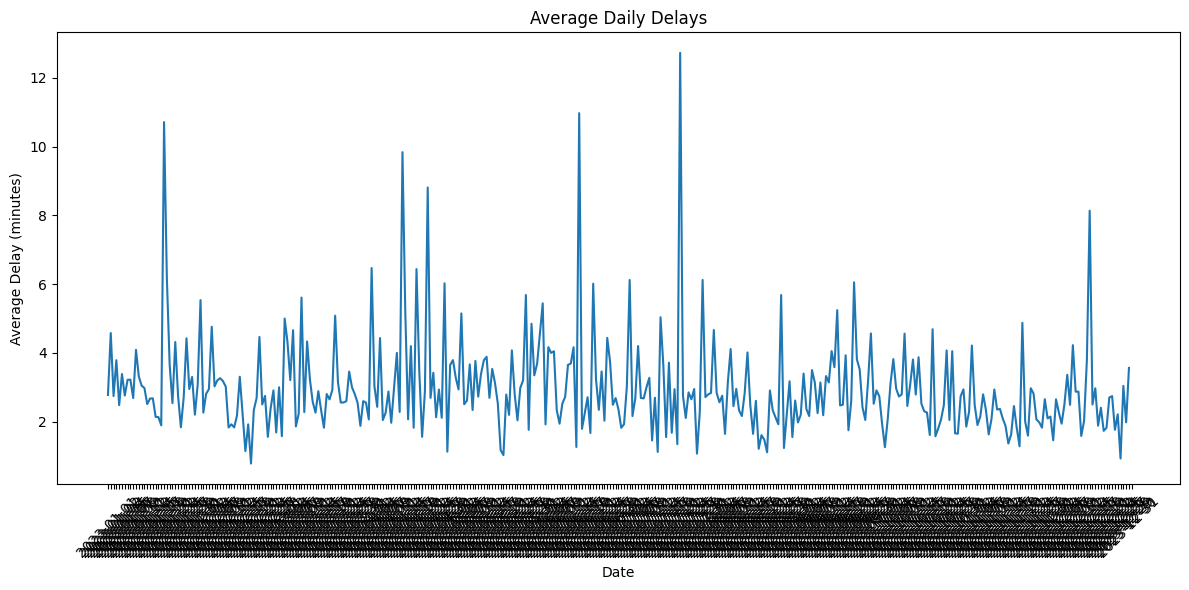

In [41]:
# Calculate average delay per day
daily_delays = delay_df.groupby('Date')['Min Delay'].mean().reset_index()

# Visualize daily average delays
plt.figure(figsize=(12, 6))
plt.plot(daily_delays['Date'], daily_delays['Min Delay'])
plt.title('Average Daily Delays')
plt.xlabel('Date')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Predictive Analysis:

C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Rohit\AppData\Local\Programs\Python\Python312\Lib

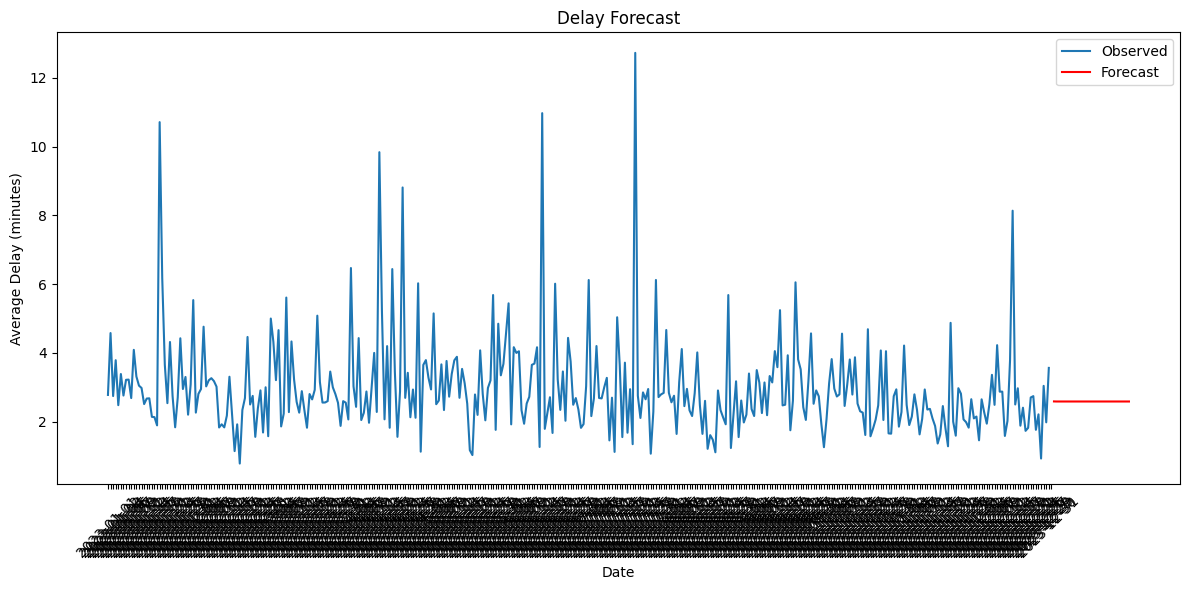

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare time series data
ts_data = daily_delays.set_index('Date')['Min Delay']

# Fit ARIMA model
model = ARIMA(ts_data, order=(1,1,1))
results = model.fit()

# Forecast future delays
forecast = results.forecast(steps=30)

# Visualize forecast
plt.figure(figsize=(12, 6))
plt.plot(ts_data.index, ts_data, label='Observed')
plt.plot(forecast.index, forecast, color='red', label='Forecast')
plt.title('Delay Forecast')
plt.xlabel('Date')
plt.ylabel('Average Delay (minutes)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This step applies time series forecasting to predict future delays.

 ## Prescriptive Analytics: Identifying Factors Influencing Delays

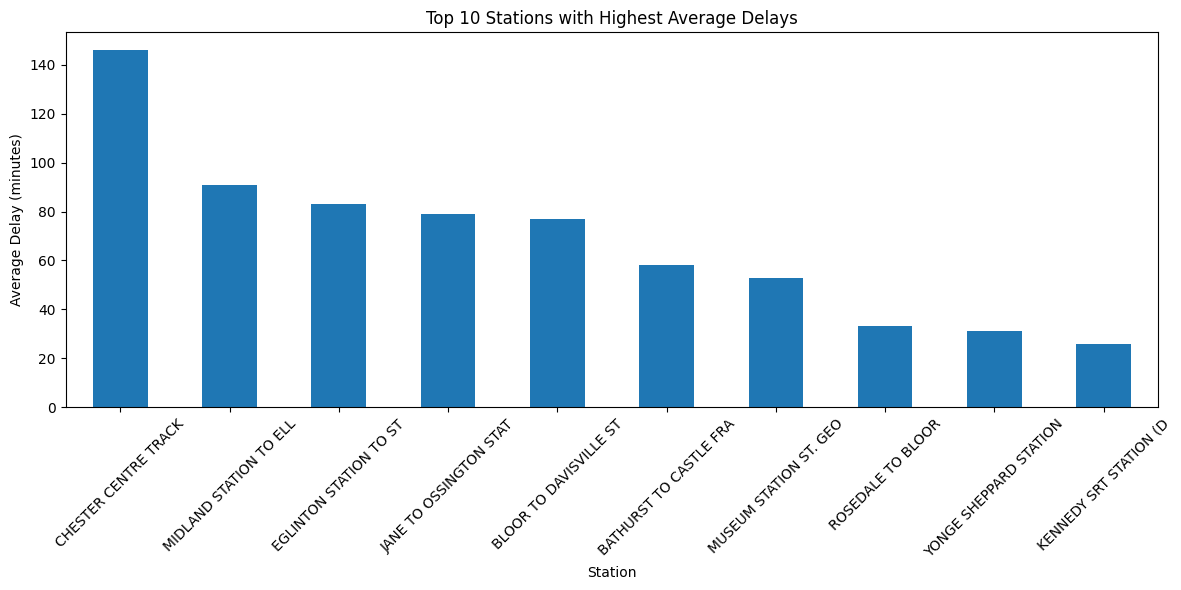

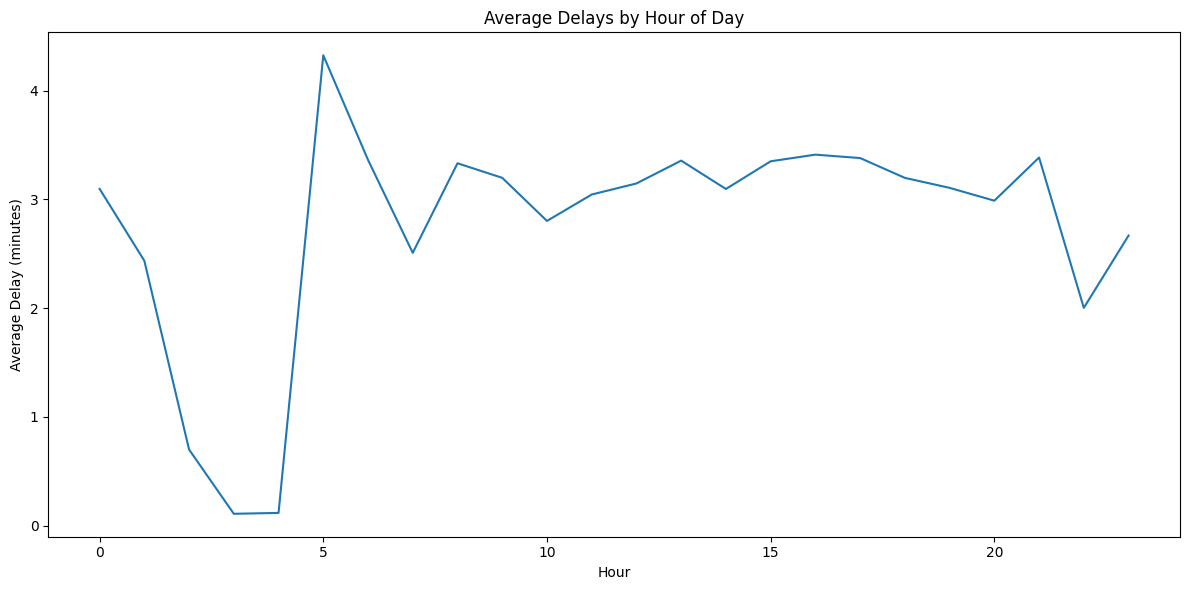

In [46]:
# Analyze delays by station
station_delays = delay_df.groupby('Station')['Min Delay'].mean().sort_values(ascending=False)

# Visualize top 10 stations with highest average delays
plt.figure(figsize=(12, 6))
station_delays.head(10).plot(kind='bar')
plt.title('Top 10 Stations with Highest Average Delays')
plt.xlabel('Station')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze delays by time of day
delay_df['Hour'] = delay_df['DateTime'].dt.hour
hourly_delays = delay_df.groupby('Hour')['Min Delay'].mean()

plt.figure(figsize=(12, 6))
hourly_delays.plot(kind='line')
plt.title('Average Delays by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average Delay (minutes)')
plt.tight_layout()
plt.show()


## Optimization Model: Linear Programming for Resource Allocation

In [53]:
!pip install pulp

   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB 640.0 kB/s eta 0:00:28
   ---------------------------------------- 0.1/17.7 MB 1.1 MB/s eta 0:00:17
    --------------------------------------- 0.4/17.7 MB 3.3 MB/s eta 0:00:06
   - -------------------------------------- 0.7/17.7 MB 4.1 MB/s eta 0:00:05
   -- ------------------------------------- 1.1/17.7 MB 5.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.4/17.7 MB 5.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.6/17.7 MB 5.2 MB/s eta 0:00:04
   ---- ----------------------------------- 2.0/17.7 MB 5.4 MB/s eta 0:00:03
   ----- ---------------------------------- 2.3/17.7 MB 5.6 MB/s eta 0:00:03
   ----- ---------------------------------- 2.6/17.7 MB 5.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.9/17.7 MB 5.9 MB/s eta 0:00:03
   ------- 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from pulp import *

# Define problem
prob = LpProblem("TTC_Delay_Reduction", LpMinimize)

# Define variables
stations = station_delays.head(10).index.tolist()
x = LpVariable.dicts("resource", stations, lowBound=0, cat='Continuous')

# Objective function
prob += lpSum([station_delays[i] * x[i] for i in stations])

# Constraints
prob += lpSum([x[i] for i in stations]) == 100  # Total resources
for i in stations:
    prob += x[i] <= 20  # Max 20% resources per station

# Solve the problem
prob.solve()

# Print results
for v in prob.variables():
    print(v.name, "=", v.varValue)

resource_BATHURST_TO_CASTLE_FRA = 20.0
resource_BLOOR_TO_DAVISVILLE_ST = 0.0
resource_CHESTER_CENTRE_TRACK = 0.0
resource_EGLINTON_STATION_TO_ST = 0.0
resource_JANE_TO_OSSINGTON_STAT = 0.0
resource_KENNEDY_SRT_STATION_(D = 20.0
resource_MIDLAND_STATION_TO_ELL = 0.0
resource_MUSEUM_STATION_ST._GEO = 20.0
resource_ROSEDALE_TO_BLOOR = 20.0
resource_YONGE_SHEPPARD_STATION = 20.0


## Implementation and Monitoring Plan

In [58]:
# Calculate potential delay reduction
current_avg_delay = delay_df['Min Delay'].mean()
target_reduction = current_avg_delay * 0.1  # 10% reduction of the current average delay

# Display results with formatted output
print(f"Current average delay: {current_avg_delay:.2f} minutes")
print(f"Target reduction (10%): {target_reduction:.2f} minutes")
print(f"New target average delay: {current_avg_delay - target_reduction:.2f} minutes")

# Create a placeholder function for a monitoring dashboard
def create_monitoring_dashboard():
    """
    Placeholder for monitoring dashboard creation.
    To be implemented using tools like Plotly Dash, Streamlit, or other visualization libraries.
    """
    print("Monitoring dashboard functionality will be implemented here.")

Current average delay: 2.97 minutes
Target reduction (10%): 0.30 minutes
New target average delay: 2.67 minutes
